In [1]:
import sys, os, pickle
sys.path.append('/home/om2382/vanilla-rtrl/')
from cluster import *
from continual_learning import *
from core import *
from dynamics import *
from functions import *
from gen_data import *
from learning_algorithms import *
from optimizers import *
from plotting import *
from wrappers import *
import matplotlib.pyplot as plt

In [2]:
i_seed = 28 #Cherry pick random seed that gives cleanest Stage 1 for illustration purposes
np.random.seed(i_seed)
task = Flip_Flop_Task(3, 0.05, input_magnitudes=None)
N_train = 20000
N_test = 1000
checkpoint_interval = 10
sigma = 0

data = task.gen_data(N_train, N_test)

n_in = task.n_in
n_hidden = 32
n_out = task.n_out
W_in  = np.random.normal(0, np.sqrt(1/(n_in)), (n_hidden, n_in))
W_rec = np.random.normal(0, np.sqrt(1/n_hidden), (n_hidden, n_hidden))
W_out = np.random.normal(0, np.sqrt(1/(n_hidden)), (n_out, n_hidden))

b_rec = np.zeros(n_hidden)
b_out = np.zeros(n_out)

alpha = 1
sigma = 0

rnn = RNN(W_in, W_rec, W_out, b_rec, b_out,
          activation=tanh,
          alpha=alpha,
          output=identity,
          loss=mean_squared_error)

learn_alg = RFLO(rnn, alpha=alpha, L1_reg=0.0001, L2_reg=0.0001)
optimizer = SGD_Momentum(lr=0.01, mu=0.6)

monitors = []

sim = Simulation(rnn)
sim.run(data, learn_alg=learn_alg, optimizer=optimizer,
        sigma=sigma,
        monitors=monitors,
        verbose=True,
        report_accuracy=False,
        report_loss=True,
        checkpoint_interval=checkpoint_interval,
        checkpoint_optimizer=False)

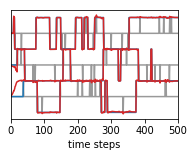

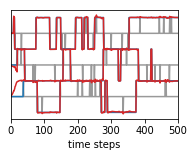

In [3]:
#Plot final checkpoint results
data = task.gen_data(0, 500)
plot_output_from_checkpoint(sim.checkpoints[sorted(sim.checkpoints.keys())[-1]], data)

In [4]:
file_name = 'Fig_1_2_RFLO_Anecdote_Result_sd={}'.format(i_seed)

In [5]:
### --- SAVE RUN --- ###
with open(os.path.join('saved_runs/', file_name), 'wb') as f:
    saved_run = {'sim': sim, 'task': task}
    pickle.dump(saved_run, f)

In [19]:
### --- OPEN RUN --- ###
with open(os.path.join('saved_runs/', file_name), 'rb') as f:
    saved_run = pickle.load(f)
    sim = saved_run['sim']
    task =saved_run['task']

In [6]:
### -- Include geometry --- ###
topological_analysis(file_name, FP_find_FPs=True, FP_KE_criterion=0.00001, FP_N=1000,
                     compare_align_checkpoints=True, compare_aligned_graph=True,
                     compare_n_comp_window=1, compare_only=False,
                     test_N=2000, test_save_data=False, compare_CKA=False,
                     compare_PC1=False, compare_PC2=False, compare_PC3=False,
                     results_subdir='PNAS_Paper')

rm: cannot remove ‘/home/om2382/learning-dynamics/results/PNAS_Paper/analyze_Fig_1_2_RFLO_Anecdote_Result_sd=28/result_*’: No such file or directory
sending incremental file list
vanilla-rtrl/
vanilla-rtrl/.DS_Store
vanilla-rtrl/.gitignore
vanilla-rtrl/README.md
vanilla-rtrl/__init__.py
vanilla-rtrl/analyze_main.py
vanilla-rtrl/compare_main.py
vanilla-rtrl/cross_compare_main.py
vanilla-rtrl/jupyter_notebook.py
vanilla-rtrl/.idea/
vanilla-rtrl/.idea/.gitignore
vanilla-rtrl/.idea/misc.xml
vanilla-rtrl/.idea/modules.xml
vanilla-rtrl/.idea/vanilla-rtrl.iml
vanilla-rtrl/.idea/vcs.xml
vanilla-rtrl/.idea/workspace.xml
vanilla-rtrl/.idea/codeStyles/
vanilla-rtrl/.idea/codeStyles/codeStyleConfig.xml
vanilla-rtrl/.idea/inspectionProfiles/
vanilla-rtrl/.idea/inspectionProfiles/profiles_settings.xml
vanilla-rtrl/.ipynb_checkpoints/
vanilla-rtrl/.ipynb_checkpoints/main-checkpoint.ipynb
vanilla-rtrl/cluster/
vanilla-rtrl/cluster/__init__.py
vanilla-rtrl/cluster/close_jupyter_notebook.py
vanilla-rtrl

vanilla-rtrl/gen_data/Flip_Flop_Task.py
vanilla-rtrl/gen_data/Mimic_RNN.py
vanilla-rtrl/gen_data/Multi_Task.py
vanilla-rtrl/gen_data/Sensorimotor_Mapping.py
vanilla-rtrl/gen_data/Sequential_MNIST.py
vanilla-rtrl/gen_data/Sine_Wave.py
vanilla-rtrl/gen_data/Task.py
vanilla-rtrl/gen_data/__init__.py
vanilla-rtrl/gen_data/gen_data_utils.py
vanilla-rtrl/learning_algorithms/
vanilla-rtrl/learning_algorithms/DNI.py
vanilla-rtrl/learning_algorithms/Efficient_BPTT.py
vanilla-rtrl/learning_algorithms/Future_BPTT.py
vanilla-rtrl/learning_algorithms/KF_RTRL.py
vanilla-rtrl/learning_algorithms/KeRNL.py
vanilla-rtrl/learning_algorithms/Learning_Algorithm.py
vanilla-rtrl/learning_algorithms/List_of_Gradients.py
vanilla-rtrl/learning_algorithms/Miconi_REINFORCE.py
vanilla-rtrl/learning_algorithms/Only_Output_Weights.py
vanilla-rtrl/learning_algorithms/REINFORCE.py
vanilla-rtrl/learning_algorithms/RFLO.py
vanilla-rtrl/learning_algorithms/RTRL.py
vanilla-rtrl/learning_algorithms/Random_Noise_Gradients.p

In [10]:
###Get job status
get_ipython().system('squeue -u om2382')

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
       3204693_[1] lkumar,bu compare_   om2382 PD       0:00      1 (Dependency)
        3204622_71 burst,lku analyze_   om2382 PD       0:00      1 (Resources)
3204622_[605-1000] lkumar,bu analyze_   om2382 PD       0:00      1 (Resources)
           3204620    lkumar  jupyter   om2382  R      24:46      1 ax14
       3204622_572     burst analyze_   om2382  R       1:32      1 ax21
       3204622_573     burst analyze_   om2382  R       1:32      1 ax21
       3204622_571     burst analyze_   om2382  R       1:33      1 ax17
       3204622_570    lkumar analyze_   om2382  R       1:44      1 ax16
       3204622_569     burst analyze_   om2382  R       1:47      1 ax10
       3204622_568     burst analyze_   om2382  R       1:49      1 ax20
       3204622_565     burst analyze_   om2382  R       1:50      1 ax20
       3204622_566     burst analyze_   om2382  R       1:50      1 ax20
       3204622_56